<a href="https://colab.research.google.com/github/hargurjeet/Credit_Card_Fraud_Detection/blob/main/Credit_card_fraud_detection_Starter_code_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
!pip install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from git import Repo
import zipfile
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

In [3]:
# Clone the github repository
git_url = 'https://github.com/hargurjeet/Credit_Card_Fraud_Detection.git'
Repo.clone_from(git_url, '/content/Credit_Card_Fraud_Dataset')

<git.repo.base.Repo '/content/Credit_Card_Fraud_Dataset/.git'>

In [4]:
# Unzip the csv file
with zipfile.ZipFile('/content/Credit_Card_Fraud_Dataset/creditcard.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Credit_Card_Fraud_Dataset/')

## Exploratory data analysis

In [5]:
df = pd.read_csv('/content/Credit_Card_Fraud_Dataset/creditcard.csv')
pd.set_option('display.max_columns', None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(classes)
print()
print('Normal Share in precentage', normal_share)
print()
print('Fraud Share in precentage', fraud_share)

0    284315
1       492
Name: Class, dtype: int64

Normal Share in precentage 99.82725143693798

Fraud Share in precentage 0.1727485630620034


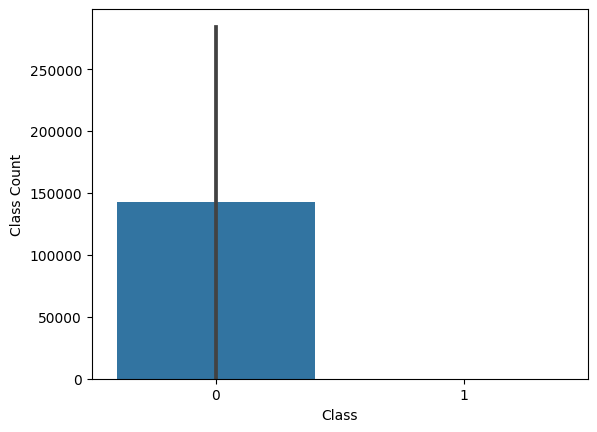

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
ax = sns.barplot(x=df["Class"], y = df['Class'].value_counts())

# Add labels to the x and y axes
ax.set_xlabel("Class")
ax.set_ylabel("Class Count")

# Show the plot
plt.show()

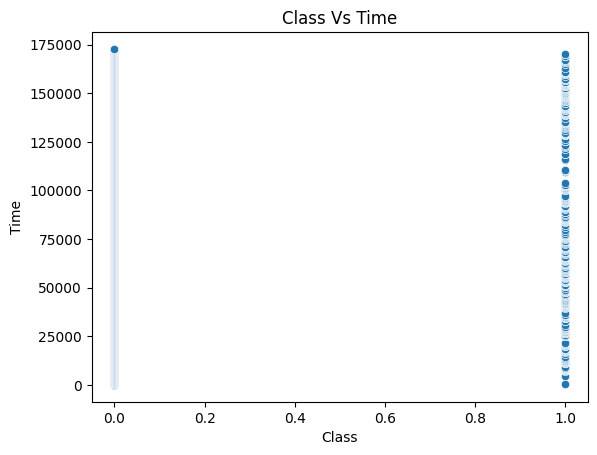

In [9]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df["Class"], y= df['Time'])
plt.title("Class Vs Time")
plt.show()

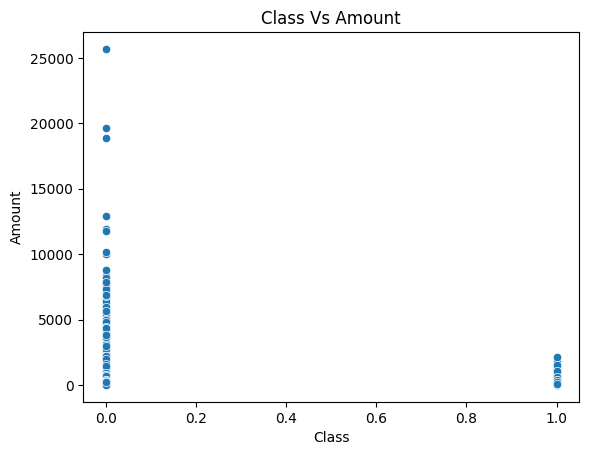

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df["Class"], y= df['Amount'])
plt.title('Class Vs Amount')
plt.show()

In [11]:
# Drop unnecessary columns
X = df.drop('Class', axis=1)

### Splitting the data into train & test data

In [12]:
y= df['Class']

In [13]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
356
136


### Plotting the distribution of a variable

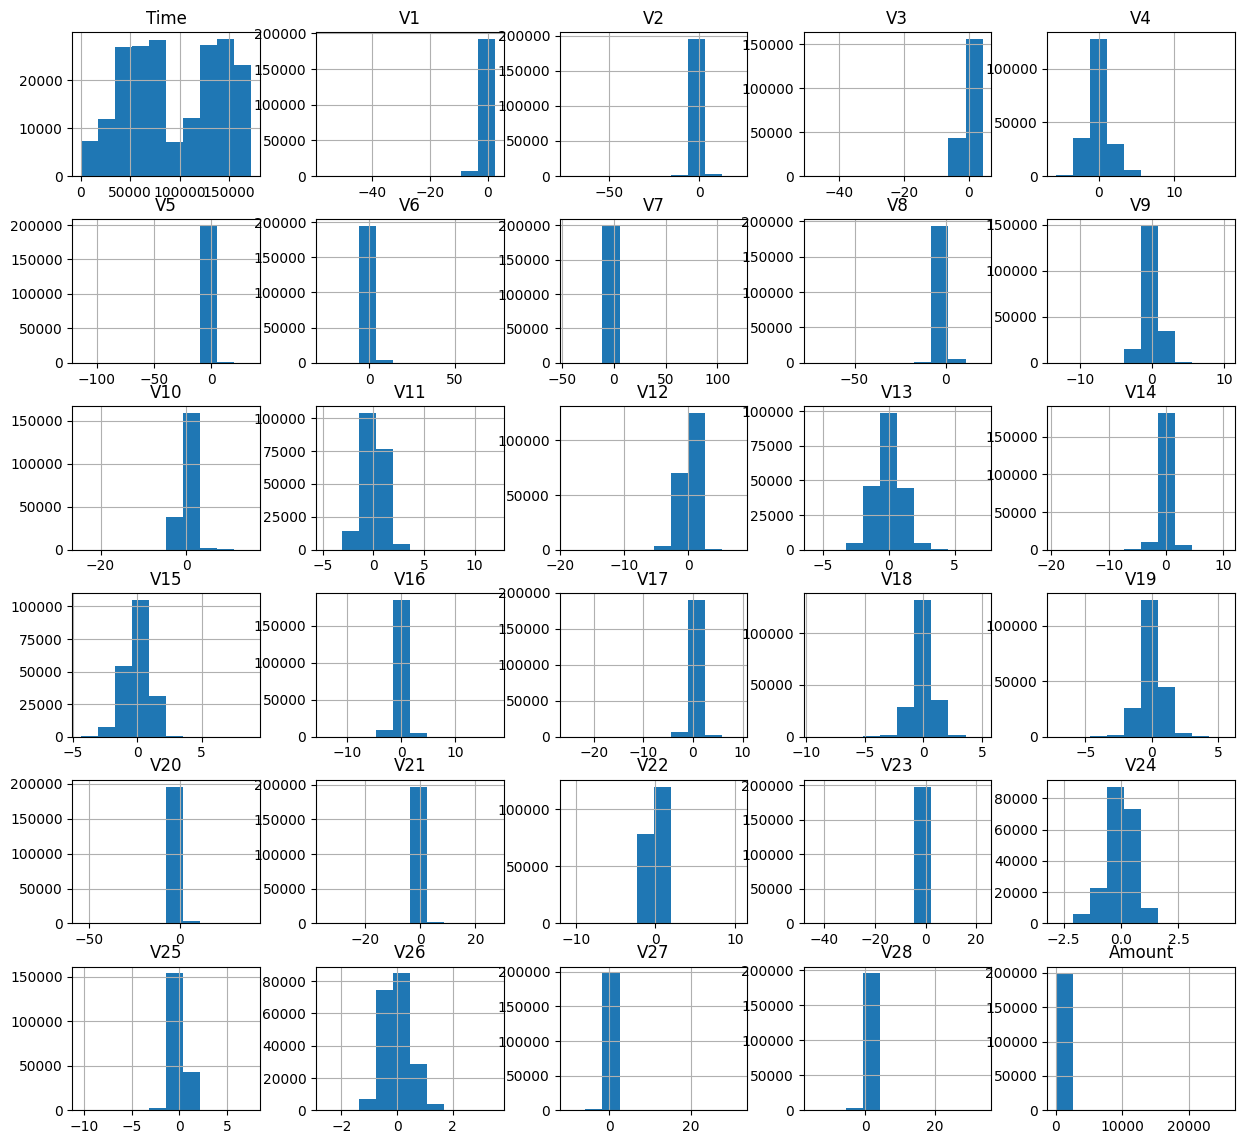

In [15]:
# plot the histogram of a variable from the dataset to see the skewness
X_train.hist(figsize=(15, 14))
plt.show();

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()
X_transformed = pt.fit_transform(X_train)

In [17]:
X_train_pt = pd.DataFrame(X_transformed, columns=X_train.columns)

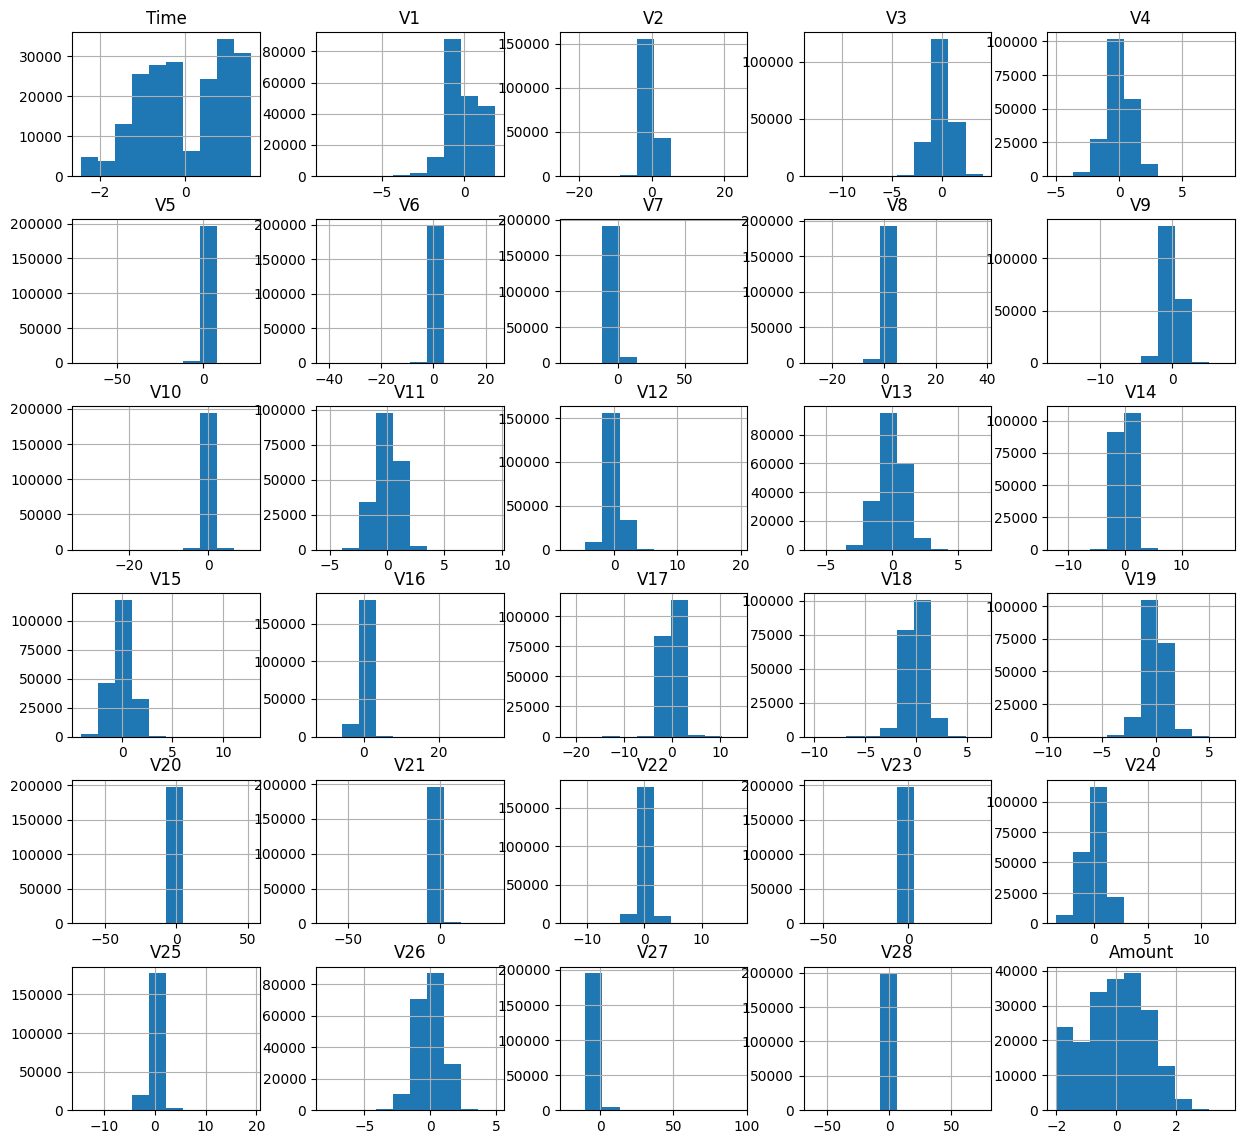

In [18]:
# plot the histogram of a variable from the dataset again to see the result
X_train_pt.hist(figsize=(15, 14))
plt.show();

## Model Building with imbalance Classes
- Build different models on the imbalanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [19]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data

# Perform train-test split for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, ], }


# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)


# Train a new model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model using test dataset
y_pred = best_model.predict(X_test)
result = f1_score(y_test, y_pred)
print(("F1 Score: %.3f") % (result))

F1 Score: 0.699


In [20]:
# Print the classification report
predicted_labels = cross_val_predict(best_model, X, y, cv=5)
report = classification_report(y, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.23      0.63      0.34       492

    accuracy                           1.00    284807
   macro avg       0.62      0.81      0.67    284807
weighted avg       1.00      1.00      1.00    284807



#### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### KNN

In [19]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5,],
              'weights': ['uniform']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='f1', verbose=10)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)

# elapsed_time = grid_search.cv_results_['mean_fit_time'].sum() + grid_search.cv_results_['mean_score_time'].sum()
# print('Time Consumed for execution', elapsed_time)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 1/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.179 total time= 1.0min
[CV 2/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 2/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.105 total time=  46.6s
[CV 3/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 3/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.128 total time=  47.5s
[CV 4/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 4/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.080 total time=  45.9s
[CV 5/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 5/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.103 total time=  46.7s
[CV 1/5; 2/2] START n_neighbors=5, weights=uniform..............................
[CV 1/5; 2/2] END n_neighbors=5, weights=uni

#### SVM

In [25]:
%%time
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1],
              'kernel': ['rbf']}

# Create an SVM classifier
svc = svm.SVC()

# Create GridSearchCV
grid_search = GridSearchCV(svc, param_grid, scoring='f1', verbose=10)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START C=0.1, kernel=rbf...........................................
[CV 1/5; 1/2] END ............C=0.1, kernel=rbf;, score=0.000 total time=   9.4s
[CV 2/5; 1/2] START C=0.1, kernel=rbf...........................................
[CV 2/5; 1/2] END ............C=0.1, kernel=rbf;, score=0.000 total time=   8.3s
[CV 3/5; 1/2] START C=0.1, kernel=rbf...........................................
[CV 3/5; 1/2] END ............C=0.1, kernel=rbf;, score=0.000 total time=   9.0s
[CV 4/5; 1/2] START C=0.1, kernel=rbf...........................................
[CV 4/5; 1/2] END ............C=0.1, kernel=rbf;, score=0.000 total time=   9.8s
[CV 5/5; 1/2] START C=0.1, kernel=rbf...........................................
[CV 5/5; 1/2] END ............C=0.1, kernel=rbf;, score=0.000 total time=   7.6s
[CV 1/5; 2/2] START C=1, kernel=rbf.............................................
[CV 1/5; 2/2] END ..............C=1, kernel=rbf;,

#### Random Forest

In [26]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10]}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(rf, param_grid, scoring='f1', verbose=10)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)
print("F1 Score on Test Data:", f1_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 1/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.813 total time=  29.2s
[CV 2/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 2/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.733 total time=  29.0s
[CV 3/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 3/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.837 total time=  29.0s
[CV 4/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 4/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.842 total time=  28.9s
[CV 5/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 5/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.857 total time=  29.4s
[CV 1/5; 2/6] START max_depth=5, n_estimators=100...............................
[CV 1/5; 2/6] END max_depth=5, n_estimators=100;,

#### XGB

In [20]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10,]}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)

Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best F1 Score: 0.8657047350185536
F1 Score on Test Data: 0.8897637795275591
CPU times: user 4min 10s, sys: 1.19 s, total: 4min 11s
Wall time: 2min 28s


In [21]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.83      0.89       136

    accuracy                           1.00     85443
   macro avg       0.98      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [22]:
clf = grid_search.best_estimator_  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_test = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("F1 Score on Test Data:", f1_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.83      0.89       136

    accuracy                           1.00     85443
   macro avg       0.98      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

F1 Score on Test Data: 0.8897637795275591


In [23]:
# Plot feature importance
feature_importance = grid_search.best_estimator_.feature_importances_
for feature_name, importance in zip(X_test.columns, feature_importance):
    print(f"{feature_name}: {importance:.4f}")

Time: 0.0115
V1: 0.0195
V2: 0.0086
V3: 0.0155
V4: 0.0304
V5: 0.0151
V6: 0.0121
V7: 0.2002
V8: 0.0166
V9: 0.0099
V10: 0.0839
V11: 0.0116
V12: 0.0635
V13: 0.0119
V14: 0.2632
V15: 0.0113
V16: 0.0175
V17: 0.0295
V18: 0.0166
V19: 0.0139
V20: 0.0156
V21: 0.0137
V22: 0.0101
V23: 0.0100
V24: 0.0101
V25: 0.0059
V26: 0.0156
V27: 0.0226
V28: 0.0156
Amount: 0.0186


In [24]:
print(clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 15
2nd Top var = 8
3rd Top var = 11


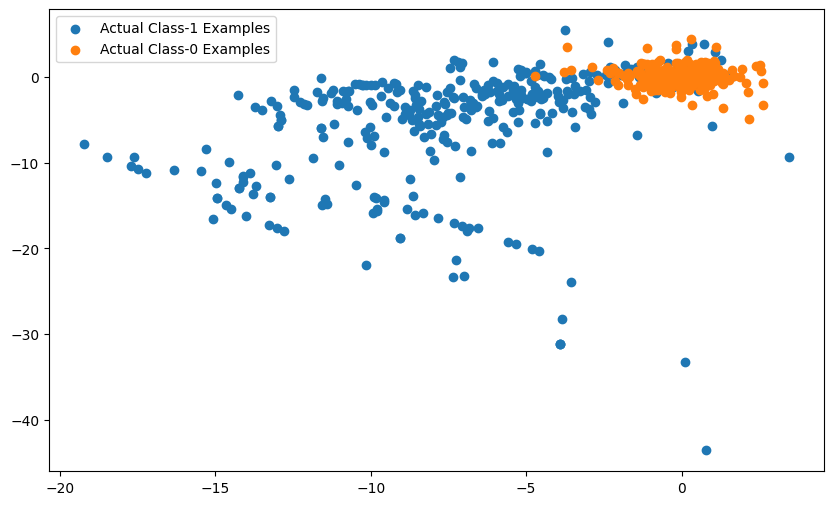

In [25]:
clf = grid_search.best_estimator_
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Model building with balancing Classes

## Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [19]:
#Over Sampling
# Define the random over-sampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Summarize the new class distribution
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 199008, 1: 199008})


## Model Building - Random Oversampling
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [20]:
y_over.value_counts()

0    199008
1    199008
Name: Class, dtype: int64

### Random Oversampling

In [21]:
%%time
#perform hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}
cv = [3, 5]

# Create a logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

cv_scores = cross_val_score(logreg, X_over, y_over, cv=5)

print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.94120898 0.93556775 0.93689936 0.94177355 0.94181124]
CPU times: user 38.5 s, sys: 10.5 s, total: 49 s
Wall time: 29.6 s


In [29]:
from sklearn.model_selection import cross_val_predict

# Assuming you have a model called 'model' that has been cross-validated
# Make predictions on the test set using cross-validated model
y_pred_cv = cross_val_predict(logreg, X_test, y_test, cv=5)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.83      0.89       136

    accuracy                           1.00     85443
   macro avg       0.98      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### KNN

In [22]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5,],
              'weights': ['uniform',]}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='f1', verbose=10)

# Fit the model to the training data
grid_search.fit(X_over, y_over)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 1/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.999 total time= 2.9min
[CV 2/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 2/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.999 total time= 2.9min
[CV 3/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 3/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.999 total time= 2.9min
[CV 4/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 4/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.999 total time= 2.9min
[CV 5/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 5/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.999 total time= 2.9min
[CV 1/5; 2/2] START n_neighbors=5, weights=uniform..............................
[CV 1/5; 2/2] END n_neighbors=5, weights=uni

#### Random Forest

In [20]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100],
              'max_depth': [5, 8]}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(rf, param_grid, scoring='f1', verbose=10)

# Fit the model to the training data
grid_search.fit(X_over, y_over)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, n_estimators=50................................
[CV 1/5; 1/4] END .max_depth=5, n_estimators=50;, score=0.961 total time=  55.3s
[CV 2/5; 1/4] START max_depth=5, n_estimators=50................................
[CV 2/5; 1/4] END .max_depth=5, n_estimators=50;, score=0.955 total time=  41.2s
[CV 3/5; 1/4] START max_depth=5, n_estimators=50................................
[CV 3/5; 1/4] END .max_depth=5, n_estimators=50;, score=0.956 total time=  41.3s
[CV 4/5; 1/4] START max_depth=5, n_estimators=50................................
[CV 4/5; 1/4] END .max_depth=5, n_estimators=50;, score=0.955 total time=  43.2s
[CV 5/5; 1/4] START max_depth=5, n_estimators=50................................
[CV 5/5; 1/4] END .max_depth=5, n_estimators=50;, score=0.957 total time=  42.1s
[CV 1/5; 2/4] START max_depth=5, n_estimators=100...............................
[CV 1/5; 2/4] END max_depth=5, n_estimators=100;,

#### XGBoost

In [21]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10,]}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_over, y_over)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)
print(classification_report(y_test, y_pred_test))

Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best F1 Score: 0.9999346815094577
F1 Score on Test Data: 0.8830188679245283
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.86      0.88  

## Model Builing with SMOTE

#### Print the class distribution after applying SMOTE

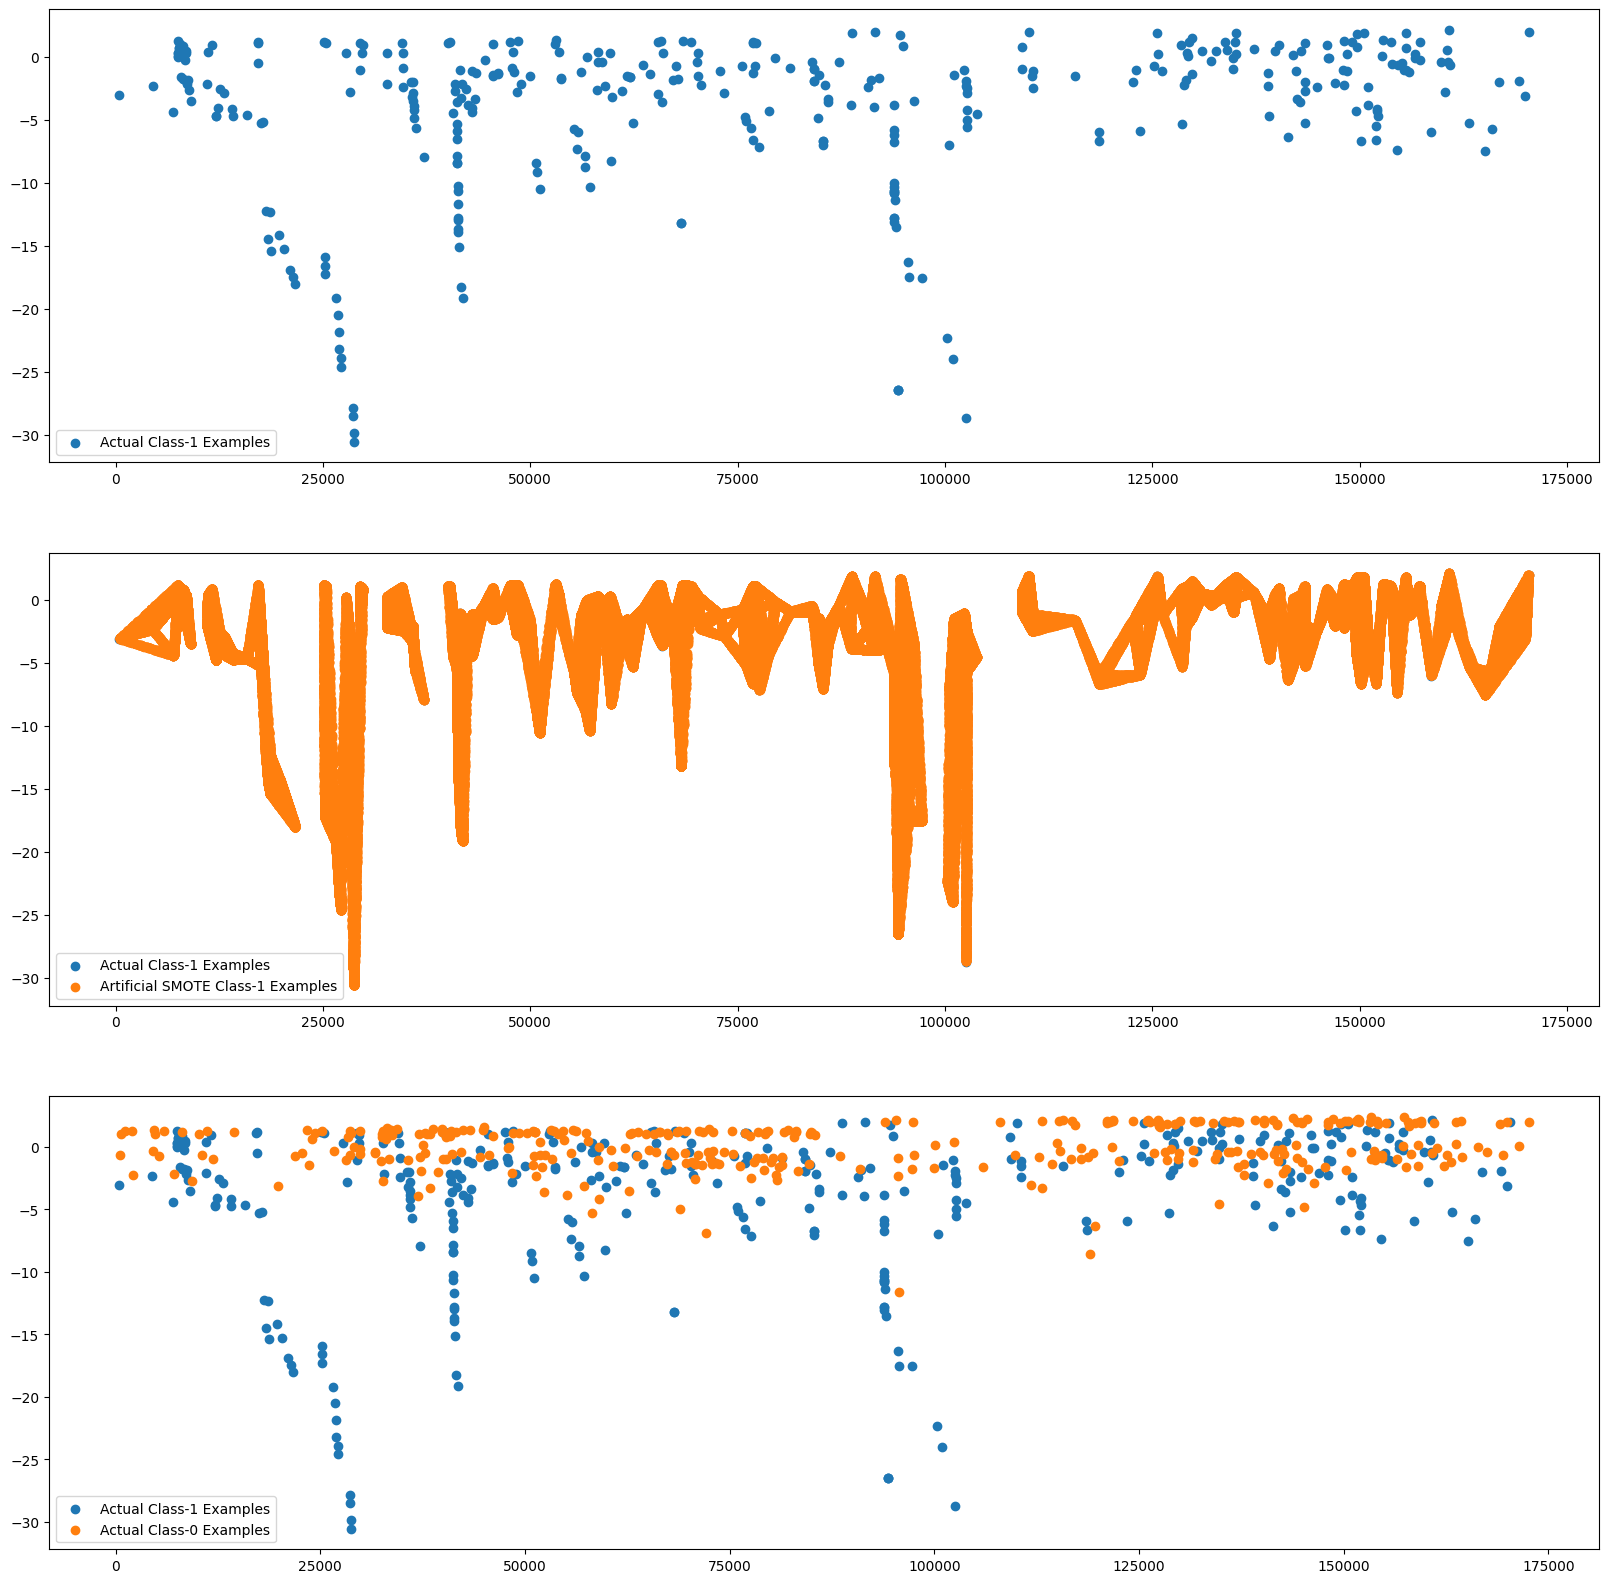

In [22]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
#             label='Artificial SMOTE Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:, 0], X_train_smote_1.iloc[:, 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [24]:
#Implementing SMOTE
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print(y_train_smote.value_counts())

#perform hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}
cv = [3, 5]

#print the evaluation result by choosing a evaluation metric
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

cv_scores = cross_val_score(logreg, X_train_smote, y_train_smote, cv=5)

#print the optimum value of hyperparameters
print("Cross-validation scores:", cv_scores)


0    199008
1    199008
Name: Class, dtype: int64
Cross-validation scores: [0.96967489 0.96972476 0.96938558 0.97289047 0.97018957]


In [25]:
from sklearn.model_selection import cross_val_predict

# Assuming you have a model called 'model' that has been cross-validated
# Make predictions on the test set using cross-validated model
y_pred_cv = cross_val_predict(logreg, X_test, y_test, cv=5)

print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.62      0.70       136

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



##### Build models on other algorithms to see the better performing on SMOTE

#### KNN

In [26]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5,],
              'weights': ['uniform']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='f1', verbose=10)

# Fit the model to the training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 1/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.966 total time= 3.7min
[CV 2/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 2/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.965 total time= 3.0min
[CV 3/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 3/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.965 total time= 2.9min
[CV 4/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 4/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.965 total time= 2.9min
[CV 5/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 5/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.964 total time= 2.9min
[CV 1/5; 2/2] START n_neighbors=5, weights=uniform..............................
[CV 1/5; 2/2] END n_neighbors=5, weights=uni

#### Random Forest

In [27]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10]}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(rf, param_grid, scoring='f1', verbose=10)

# Fit the model to the training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 1/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.966 total time= 1.2min
[CV 2/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 2/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.965 total time= 1.1min
[CV 3/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 3/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.966 total time= 1.2min
[CV 4/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 4/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.966 total time= 1.1min
[CV 5/5; 1/6] START max_depth=5, n_estimators=50................................
[CV 5/5; 1/6] END .max_depth=5, n_estimators=50;, score=0.965 total time= 1.1min
[CV 1/5; 2/6] START max_depth=5, n_estimators=100...............................
[CV 1/5; 2/6] END max_depth=5, n_estimators=100;,

#### XGBoost

In [28]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [5, 8,]}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)
print(classification_report(y_test, y_pred_test))

Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best F1 Score: 0.9998643466025847
F1 Score on Test Data: 0.8169014084507041
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.85      0.82  

#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [29]:
clf = grid_search.best_estimator_  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_test = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("F1 Score on Test Data:", f1_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

F1 Score on Test Data: 0.8740157480314961


In [30]:
# Plot feature importance
feature_importance = grid_search.best_estimator_.feature_importances_
for feature_name, importance in zip(X_test.columns, feature_importance):
    print(f"{feature_name}: {importance:.4f}")

Time: 0.0106
V1: 0.0208
V2: 0.0123
V3: 0.0136
V4: 0.0307
V5: 0.0149
V6: 0.0129
V7: 0.1957
V8: 0.0171
V9: 0.0113
V10: 0.0639
V11: 0.0145
V12: 0.0585
V13: 0.0118
V14: 0.2794
V15: 0.0115
V16: 0.0151
V17: 0.0238
V18: 0.0154
V19: 0.0142
V20: 0.0157
V21: 0.0138
V22: 0.0112
V23: 0.0093
V24: 0.0122
V25: 0.0069
V26: 0.0196
V27: 0.0259
V28: 0.0162
Amount: 0.0211


## Model Builing with ADASYN

### Print the class distribution after applying ADASYN

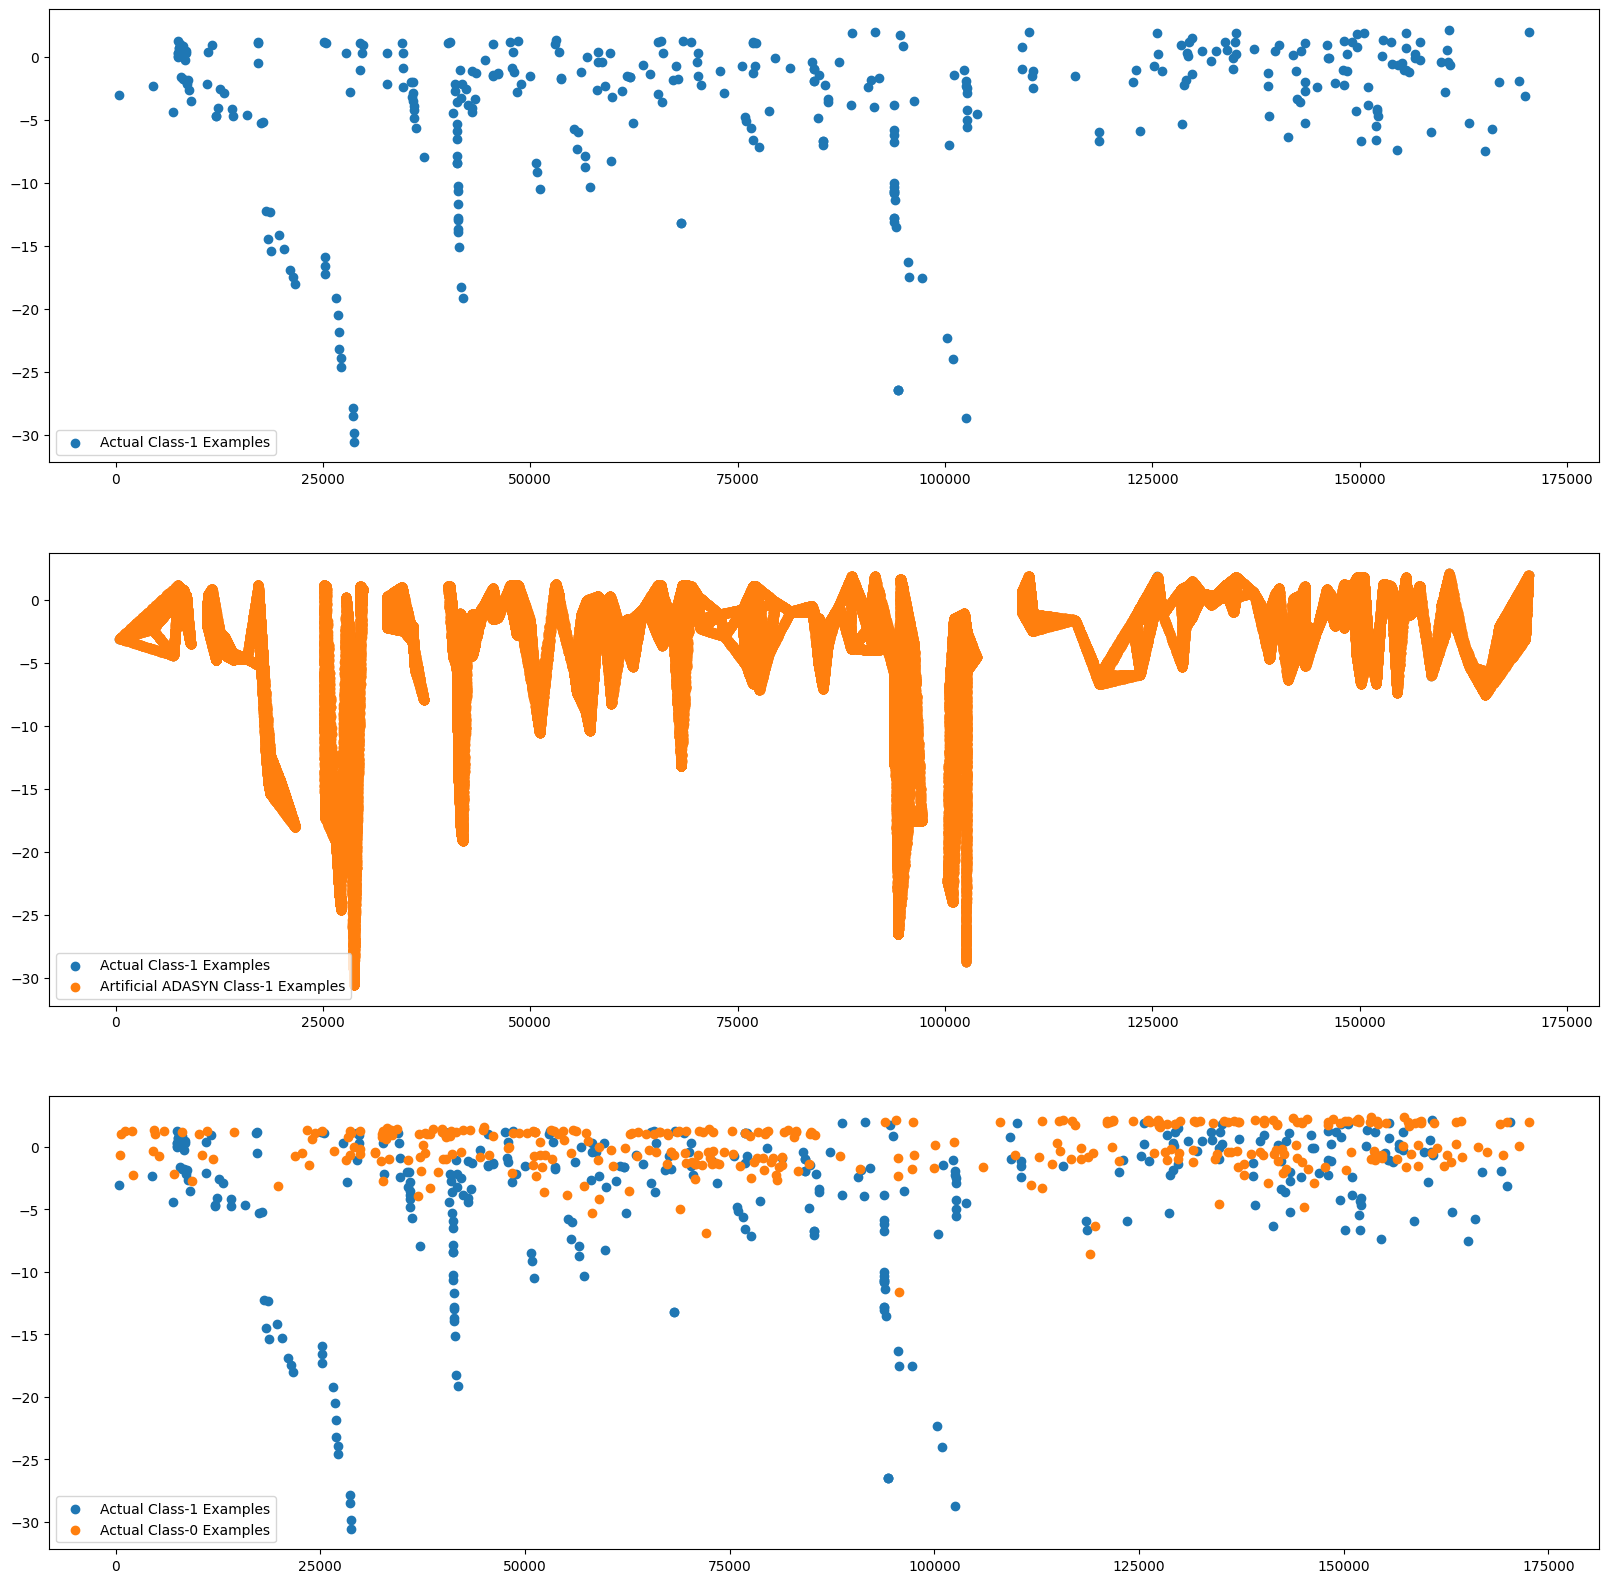

In [32]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
#             label='Artificial ADASYN Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:, 0], X_train_adasyn_1.iloc[:, 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [33]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
print(y_train_adasyn.value_counts())

#perform hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}
cv = [3, 5]


#print the evaluation result by choosing a evaluation metric
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

cv_scores = cross_val_score(logreg, X_train_adasyn, y_train_adasyn, cv=5)

#print the optimum value of hyperparameters
print("Cross-validation scores:", cv_scores)

0    199008
1    198960
Name: Class, dtype: int64
Cross-validation scores: [0.96152976 0.94739553 0.96681911 0.9704371  0.9640295 ]


In [34]:
# Assuming you have a model called 'model' that has been cross-validated
# Make predictions on the test set using cross-validated model
y_pred_cv = cross_val_predict(logreg, X_test, y_test, cv=5)

print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.62      0.70       136

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



##### Build models on other algorithms to see the better performing on ADASYN

### KNN

In [35]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5,],
              'weights': ['uniform']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='f1',verbose=10)

# Fit the model to the training data
grid_search.fit(X_train_adasyn, y_train_adasyn)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 1/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.908 total time= 3.6min
[CV 2/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 2/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.900 total time= 3.7min
[CV 3/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 3/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.889 total time= 2.9min
[CV 4/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 4/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.904 total time= 2.9min
[CV 5/5; 1/2] START n_neighbors=3, weights=uniform..............................
[CV 5/5; 1/2] END n_neighbors=3, weights=uniform;, score=0.893 total time= 2.9min
[CV 1/5; 2/2] START n_neighbors=5, weights=uniform..............................
[CV 1/5; 2/2] END n_neighbors=5, weights=uni

### Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100],}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(rf, param_grid, scoring='f1',verbose=10)

# Fit the model to the training data
grid_search.fit(X_train_adasyn, y_train_adasyn)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START n_estimators=50.............................................
[CV 1/5; 1/2] END ..............n_estimators=50;, score=0.989 total time= 3.1min
[CV 2/5; 1/2] START n_estimators=50.............................................
[CV 2/5; 1/2] END ..............n_estimators=50;, score=0.989 total time= 3.1min
[CV 3/5; 1/2] START n_estimators=50.............................................
[CV 3/5; 1/2] END ..............n_estimators=50;, score=0.992 total time= 3.0min
[CV 4/5; 1/2] START n_estimators=50.............................................
[CV 4/5; 1/2] END ..............n_estimators=50;, score=0.993 total time= 3.0min
[CV 5/5; 1/2] START n_estimators=50.............................................
[CV 5/5; 1/2] END ..............n_estimators=50;, score=0.994 total time= 2.9min
[CV 1/5; 2/2] START n_estimators=100............................................
[CV 1/5; 2/2] END .............n_estimators=100;,

### XGBoost

In [ ]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10,]}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train_adasyn, y_train_adasyn)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Test Data:", f1_test)
print(classification_report(y_test, y_pred_test))

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = grid_search.best_estimator_  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn) # fit on the balanced dataset
y_pred_test = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred_test))  #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)